<h1 style="text-align: center;">Loan Default Prediction </h1>

### Load Libraries
Import necessary Libraries like Numpy,Pandas for Data Exploration, Matplotlib,Seaborn for Data Visualization and other necessary Pre-processing,modelling,imputing libraries from sklearn

In [22]:
#import necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler,PowerTransformer,OneHotEncoder
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier

### Extract data
Csv file format is converted into pandas Dataframe for efficient analysis and modelling using read_csv method

In [23]:
# Load loan default dataset
df = pd.read_csv("loan_default_prediction_project.csv")

### Explore data
Dataset has 1000 Rows and 12 columns with columns like Age,Gender,Income,Employment Status,Credit Score etc.Int64,Float64,Object are the three major datatypes present.Gender column has 208 null values and Employment Status has 94 null values.Both columns are categorical in nature.

In [24]:
#Find number of Rows and columns in dataset
df.shape
print("No of Rows    :", df.shape[0])
print("No of Columns :", df.shape[1])

No of Rows    : 1000
No of Columns : 12


In [25]:
df.columns

Index(['Age', 'Gender', 'Income', 'Employment_Status', 'Location',
       'Credit_Score', 'Debt_to_Income_Ratio', 'Existing_Loan_Balance',
       'Loan_Status', 'Loan_Amount', 'Interest_Rate', 'Loan_Duration_Months'],
      dtype='object')

In [5]:
#Overview of dataset
df.head()

Age  Gender        Income Employment_Status  Location  Credit_Score  \
0   56    Male  71266.105175          Employed  Suburban           639   
1   46     NaN  37283.054601          Employed  Suburban           474   
2   32    Male  69567.036392          Employed     Urban           750   
3   60  Female  72016.087392          Employed     Rural           435   
4   25  Female  32161.988250        Unemployed  Suburban           315   

   Debt_to_Income_Ratio  Existing_Loan_Balance  Loan_Status   Loan_Amount  \
0              0.007142           27060.188289  Non-Default  13068.330587   
1              0.456731           40192.994312      Default  15159.338369   
2              0.329231           25444.262759      Default   6131.287659   
3              0.052482            3122.213749  Non-Default  37531.880251   
4              0.450236           19197.350445  Non-Default  41466.397989   

   Interest_Rate  Loan_Duration_Months  
0      18.185533                    59  
1      11.727471                    69  
2      17.030462                    69  
3      16.868949                    26  
4      18.891582                    66

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 792 non-null    object 
 2   Income                 1000 non-null   float64
 3   Employment_Status      906 non-null    object 
 4   Location               1000 non-null   object 
 5   Credit_Score           1000 non-null   int64  
 6   Debt_to_Income_Ratio   1000 non-null   float64
 7   Existing_Loan_Balance  1000 non-null   float64
 8   Loan_Status            1000 non-null   object 
 9   Loan_Amount            1000 non-null   float64
 10  Interest_Rate          1000 non-null   float64
 11  Loan_Duration_Months   1000 non-null   int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 93.9+ KB


In [405]:
df.describe()

Age         Income  Credit_Score  Debt_to_Income_Ratio  \
count  1000.000000    1000.000000   1000.000000           1000.000000   
mean     40.986000   60705.291386    571.094000              0.485502   
std      13.497852   24594.030383    163.395983              0.296466   
min      18.000000   20010.775440    250.000000              0.000628   
25%      29.000000   40820.367273    429.000000              0.220606   
50%      42.000000   60547.119929    567.000000              0.483633   
75%      52.000000   80338.552791    720.250000              0.735476   
max      64.000000  150000.000000    849.000000              0.999849   

       Existing_Loan_Balance   Loan_Amount  Interest_Rate  \
count            1000.000000   1000.000000    1000.000000   
mean            25239.656186  27636.369345      11.538267   
std             14202.689890  12925.200961       4.883342   
min                80.059377   5060.998602       3.003148   
25%             13597.494593  16756.405848       7.483547   
50%             25439.429898  27938.066858      11.537942   
75%             37305.466739  39151.564233      15.499129   
max             49987.578171  49986.843702      19.991438   

       Loan_Duration_Months  
count           1000.000000  
mean              42.221000  
std               17.116867  
min               12.000000  
25%               27.000000  
50%               42.000000  
75%               57.000000  
max               71.000000

In [7]:
#Find number of Null values
#Gender and Employment Status has null values which is to be handled
df.isnull().sum()

Age                        0
Gender                   208
Income                     0
Employment_Status         94
Location                   0
Credit_Score               0
Debt_to_Income_Ratio       0
Existing_Loan_Balance      0
Loan_Status                0
Loan_Amount                0
Interest_Rate              0
Loan_Duration_Months       0
dtype: int64

In [410]:
#Explore Gender and Employment Status for handling null values
#Equal distribution of Female, Male Employed
dfge = df.groupby(by=["Gender", "Employment_Status"], as_index=False).size()
dfge

Gender Employment_Status  size
0  Female          Employed   236
1  Female        Unemployed   126
2    Male          Employed   233
3    Male        Unemployed   127

In [45]:
#Gender and Employment Loan Status distribution
dfg = df.groupby(by=["Gender", "Loan_Status"], as_index=False).size()
dfe = df.groupby(by=["Employment_Status", "Loan_Status"], as_index=False).size()
df2 = pd.concat([dfg,dfe],axis=1)
df2

Gender  Loan_Status  size Employment_Status  Loan_Status  size
0  Female      Default    88          Employed      Default   119
1  Female  Non-Default   311          Employed  Non-Default   477
2    Male      Default    73        Unemployed      Default    60
3    Male  Non-Default   320        Unemployed  Non-Default   250

In [46]:
#Exploring relationship between male female income category
#On Analysis no solid relationship could be found
dfm = df.loc[df['Gender']=='Male','Income'].describe()
dff = df.loc[df['Gender']=='Female','Income'].describe()
dfc = pd.concat([dfm,dff],axis = 1)
print("'Male Vs Female Income Distribution'")
dfc

'Male Vs Female Income Distribution'


Income         Income
count     393.000000     399.000000
mean    60075.210977   61099.839227
std     24034.305409   25375.480561
min     20010.775440   20125.208415
25%     41407.414138   40765.924242
50%     60592.955097   59825.000643
75%     78333.879004   82288.361303
max    150000.000000  150000.000000

In [47]:
#Exploring Relationship between Employed,Unemployed Vs Income Category
dfem = df.loc[df['Employment_Status']=='Employed','Income'].describe()
dfum = df.loc[df['Employment_Status']=='Unemployed','Income'].describe()
dfemm = pd.concat([dfem,dfum],axis = 1)
print("'Employed Vs Unemployed Income Distribution'")
dfemm

'Employed Vs Unemployed Income Distribution'


Income         Income
count     596.000000     310.000000
mean    60527.676396   61145.794617
std     24680.034657   24802.896800
min     20010.775440   20257.461088
25%     41420.598679   41003.269591
50%     60458.913323   60945.569590
75%     80880.201407   80529.362620
max    150000.000000  150000.000000

In [26]:
df_encode = df.copy()

### Data Cleaning
Gender and Employment Status has null values of 208, 94 each. Both columns are categorical in nature and contain null values. As these are categorical values fillna with median/mode is not helpful much.KnnImputer looks like a better idea. Both columns are as objects and has to be converted to numerical values for knnimputation to work. One-hot Encoding doenn't work because it considers nan values as seperate class and Label Encoder cannot handle null values. Hence, Label Encoding is done manually with with map function and after handling null values imputation has been done with knnimputer.

In [27]:
#Label Encoding Categorical values with map to preserve nan for imputation
df_encode['Gender']=df_encode['Gender'].map({'Male':0,'Female':1})
df_encode['Employment_Status'] = df_encode['Employment_Status'].map({'Unemployed' : 0,'Employed' : 1})
df_encode['Location'] = df_encode['Location'].map({'Rural': 0,'Suburban' : 1,'Urban' : 2})
df_encode['Loan_Status'] = df_encode['Loan_Status'].map({'Default' : 0,'Non-Default' : 1})

In [28]:
#Impute Nan Values in Gender and Employment Status with KNNimputer
imputer = KNNImputer(n_neighbors=1)
df_nan = imputer.fit_transform(df_encode)

In [29]:
#Converting numpy array to dataframe
df_encoded = pd.DataFrame(df_nan, columns=['Age', 'Gender', 'Income', 'Employment_Status', 'Location',
       'Credit_Score', 'Debt_to_Income_Ratio', 'Existing_Loan_Balance',
       'Loan_Status', 'Loan_Amount', 'Interest_Rate', 'Loan_Duration_Months'])

In [30]:
#Check null values after imputation
df_encoded.isnull().sum()

Age                      0
Gender                   0
Income                   0
Employment_Status        0
Location                 0
Credit_Score             0
Debt_to_Income_Ratio     0
Existing_Loan_Balance    0
Loan_Status              0
Loan_Amount              0
Interest_Rate            0
Loan_Duration_Months     0
dtype: int64

In [31]:
#Gender,Employment Vs Loan Status distribution After Encoding
dfg = df.groupby(by=["Gender", "Loan_Status"], as_index=False).size()
dfag = df_encoded.groupby(by=["Gender", "Loan_Status"], as_index=False).size()
dfe = df.groupby(by=["Employment_Status", "Loan_Status"], as_index=False).size()
dfae = df_encoded.groupby(by=["Employment_Status", "Loan_Status"], as_index=False).size()
df2 = pd.concat([dfg,dfe],axis=1)
df3 = pd.concat([dfag,dfae],axis=1)
print("Before Encoding :")
print(df2)
print("After Encoding:")
print(df3)

Before Encoding :
   Gender  Loan_Status  size Employment_Status  Loan_Status  size
0  Female      Default    88          Employed      Default   119
1  Female  Non-Default   311          Employed  Non-Default   477
2    Male      Default    73        Unemployed      Default    60
3    Male  Non-Default   320        Unemployed  Non-Default   250
After Encoding:
   Gender  Loan_Status  size  Employment_Status  Loan_Status  size
0     0.0          0.0    88                0.0          0.0    62
1     0.0          1.0   393                0.0          1.0   270
2     1.0          0.0   107                1.0          0.0   133
3     1.0          1.0   412                1.0          1.0   535


### Univariate Analysis

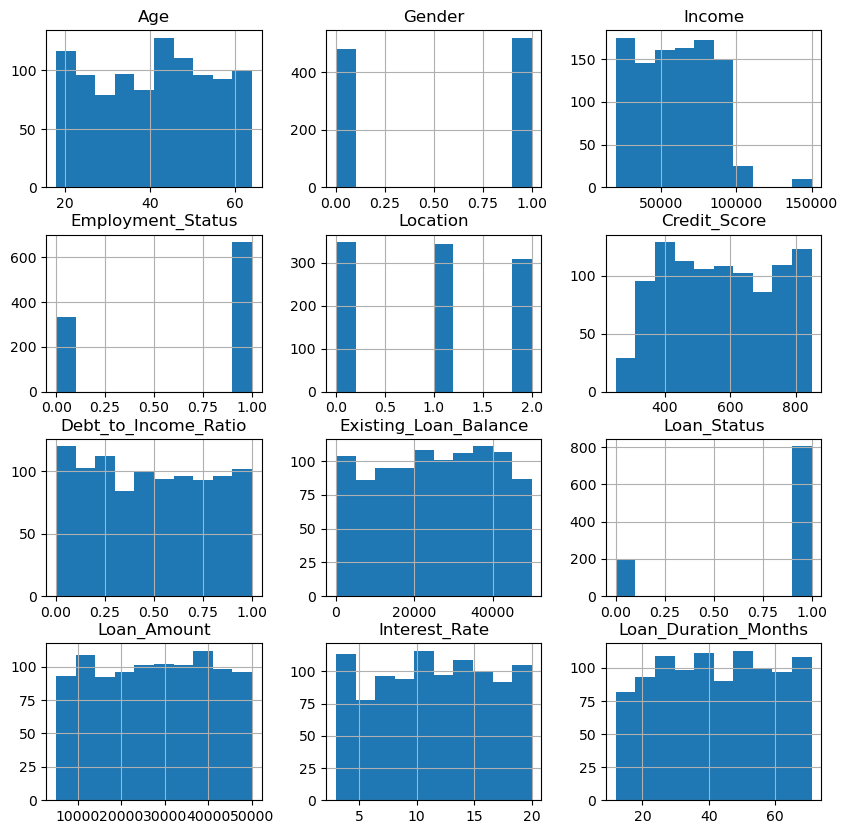

In [32]:
df_encoded.hist(figsize=(10,10))
plt.show()

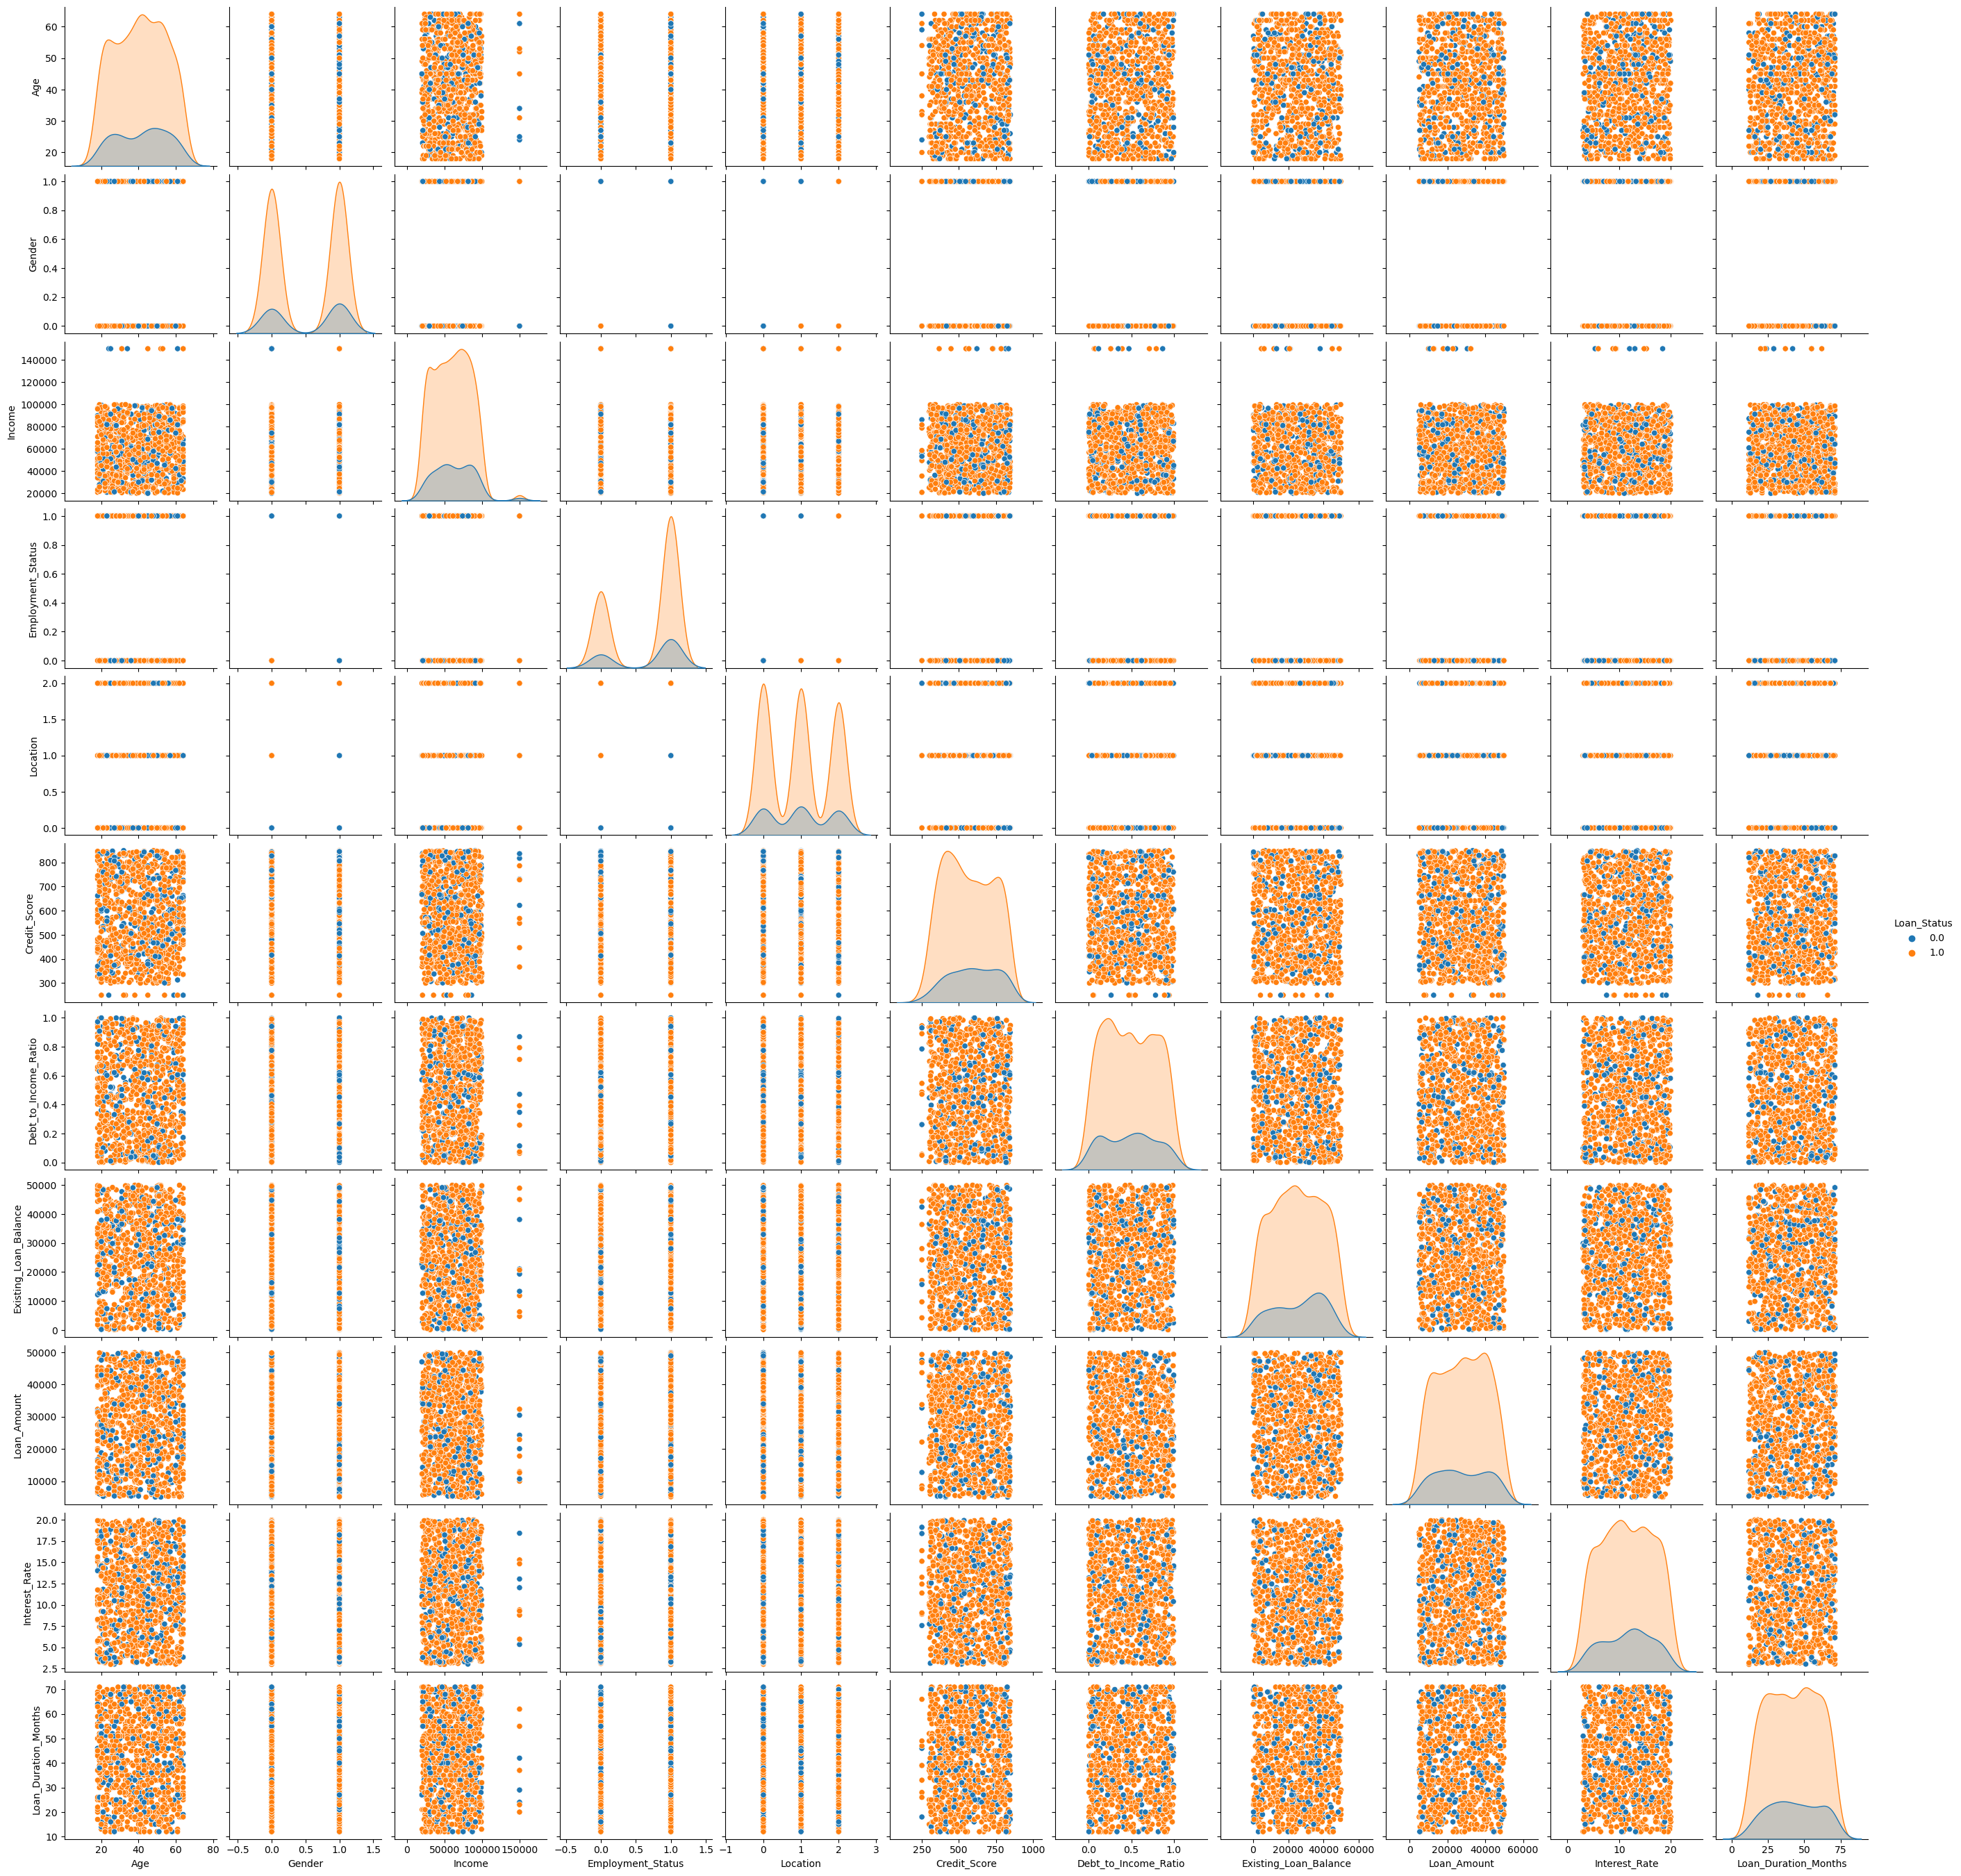

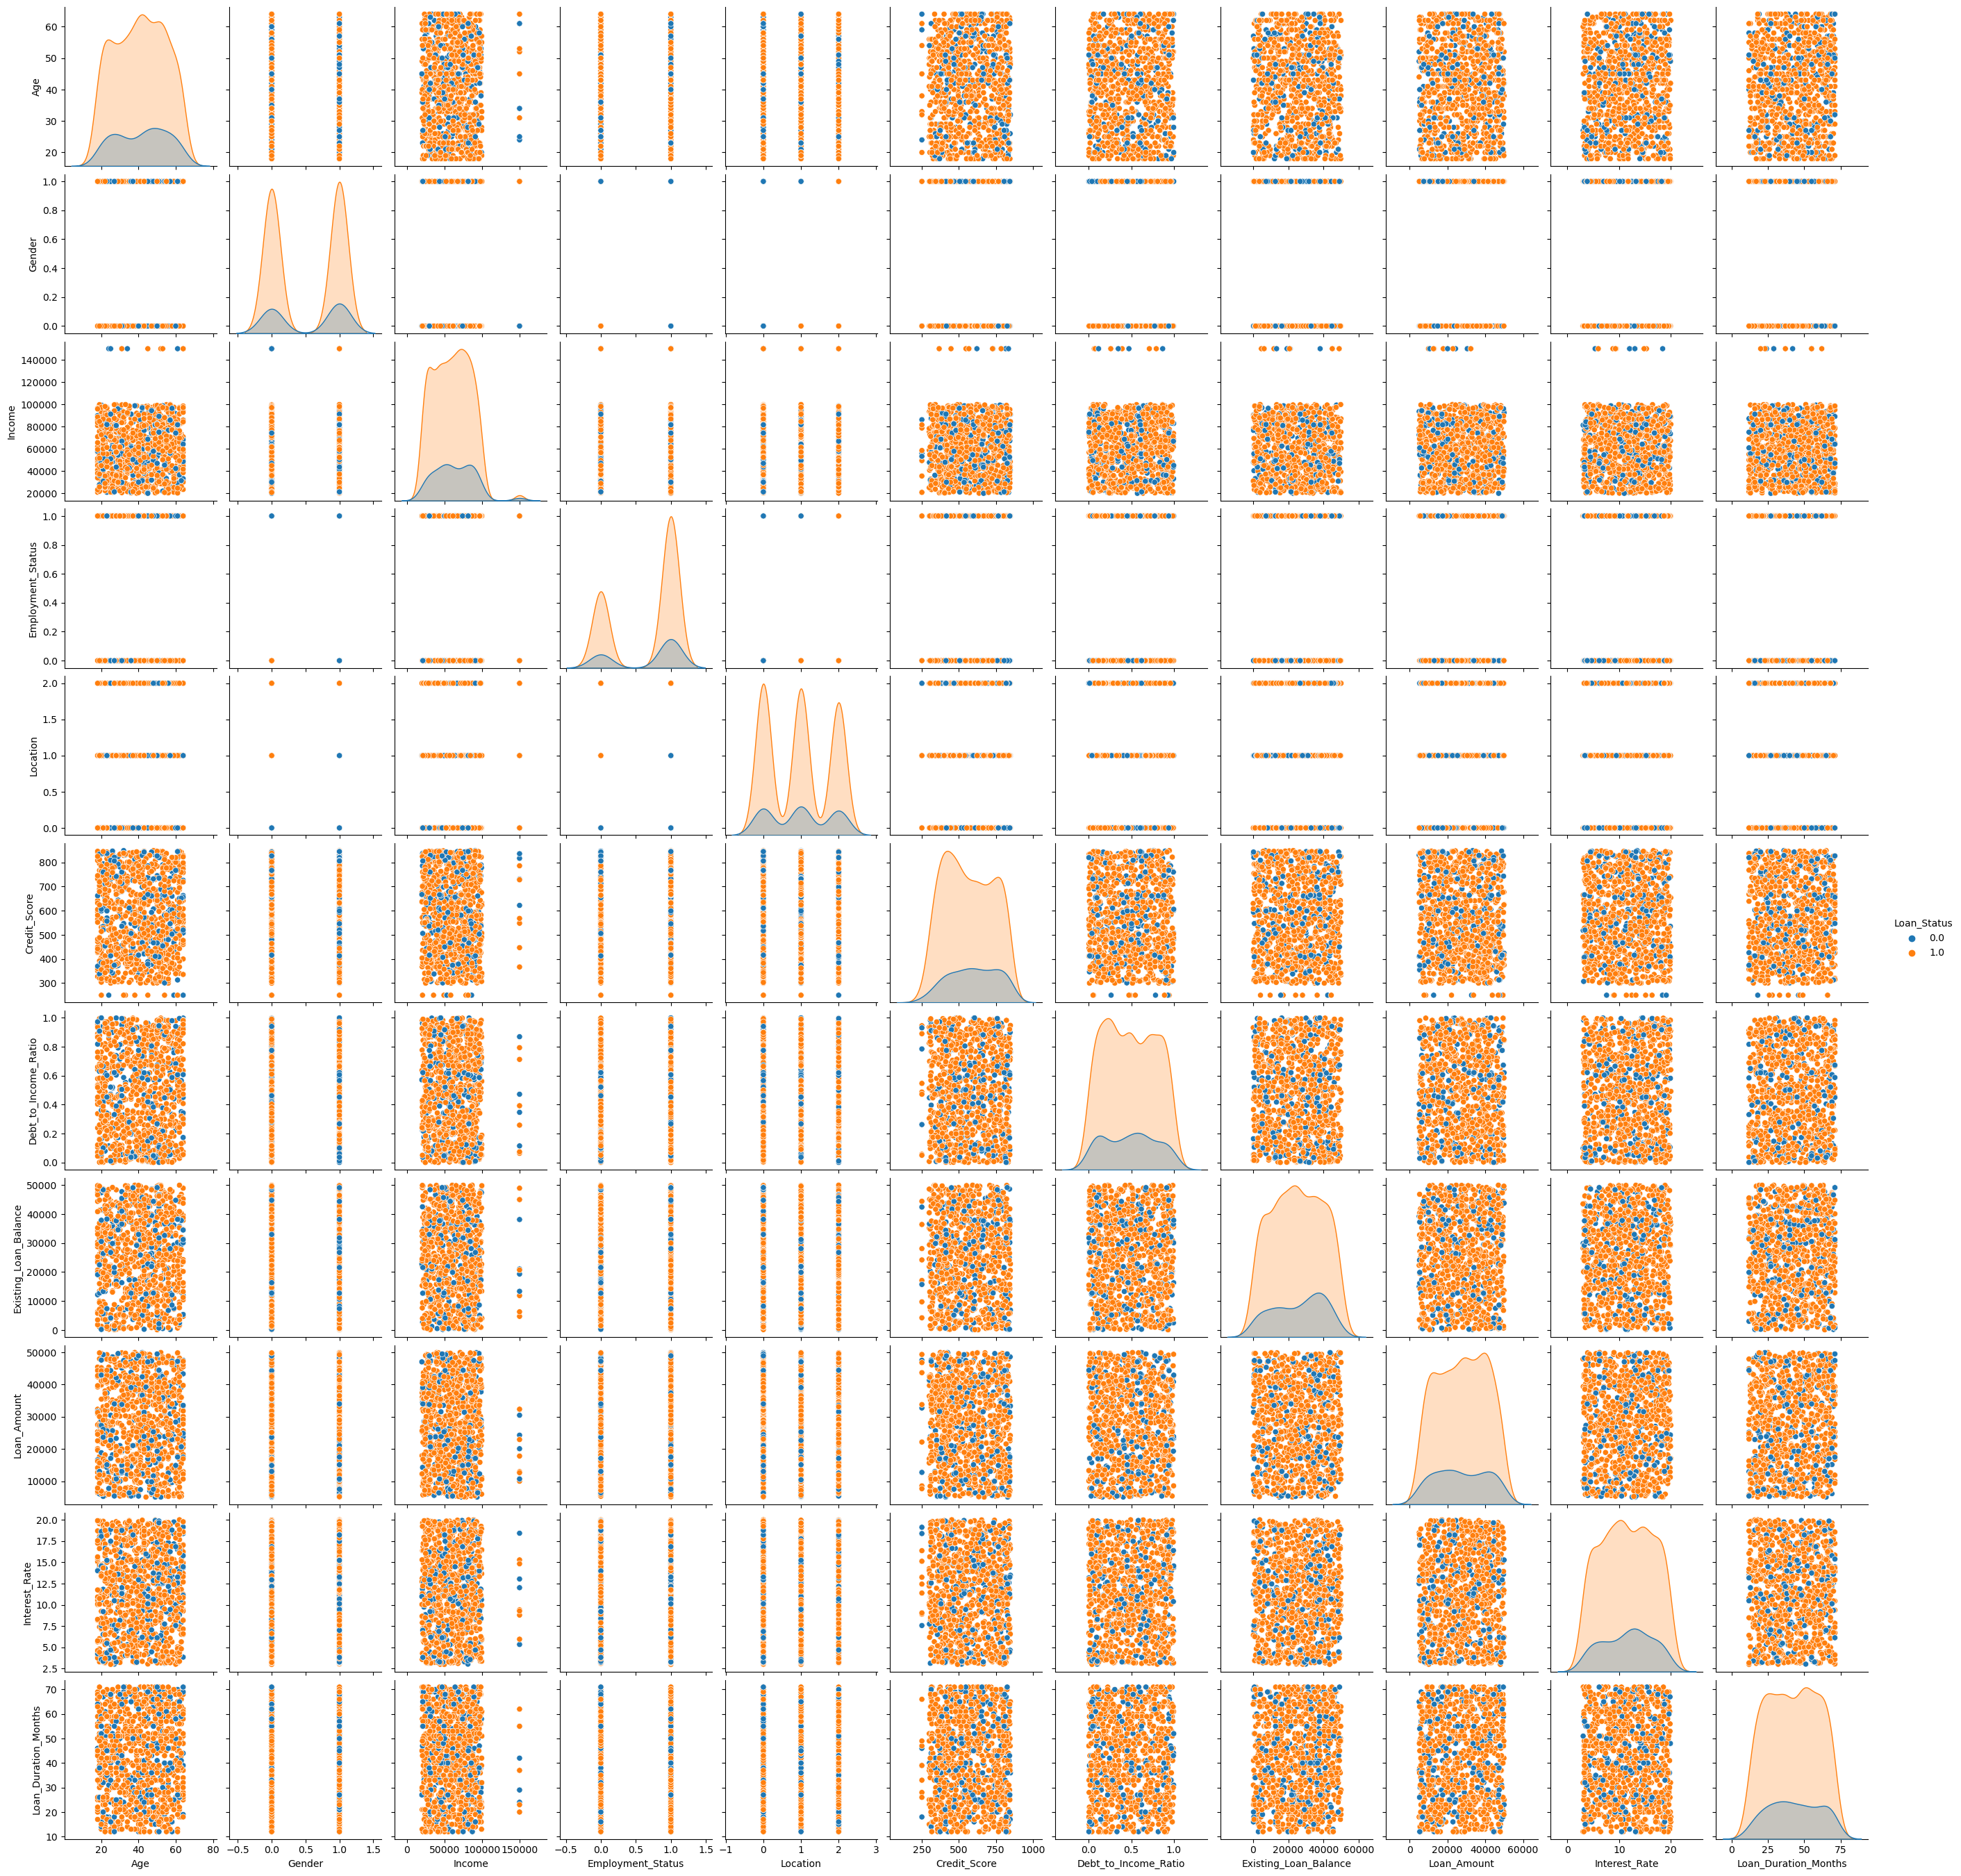

In [38]:
sns.pairplot(df_encoded,hue = 'Loan_Status',diag_kind ='kde')
plt.show()


<Figure size 640x480 with 0 Axes>

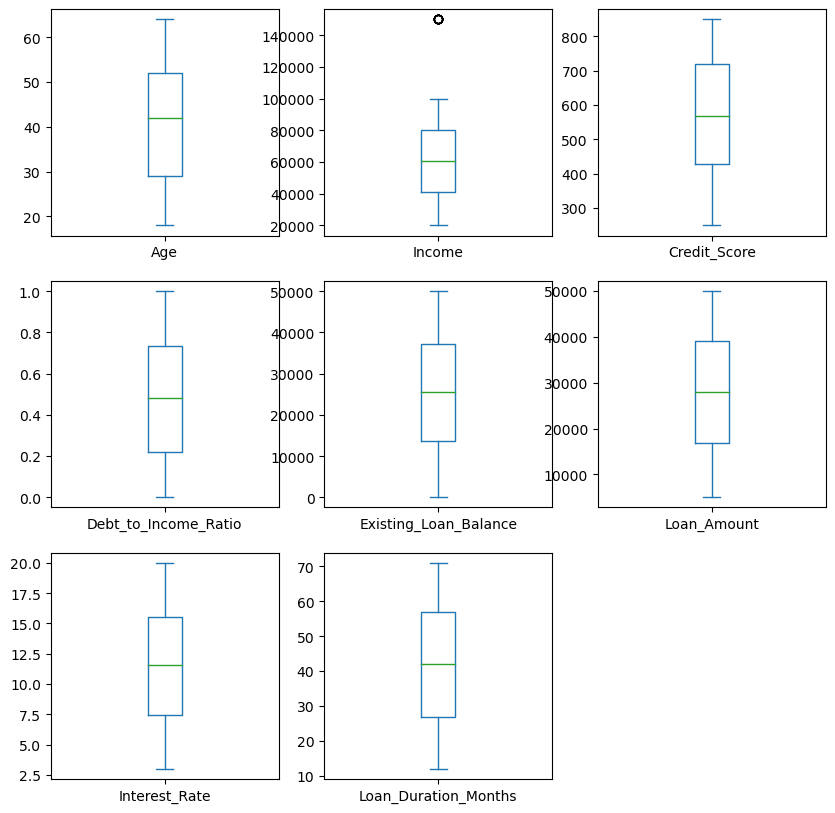

In [216]:
#Box-plot Visualization
numerical_columns = ['Age','Income','Credit_Score', 'Debt_to_Income_Ratio', 'Existing_Loan_Balance',
       'Loan_Amount', 'Interest_Rate', 'Loan_Duration_Months']
fig = plt.figure()
fig = plt.figure(figsize=(10, 10))
for i in range(len(numerical_columns)):
    var = numerical_columns[i]
    sub = fig.add_subplot(3,3, i + 1)
    df_encoded[var].plot(kind = 'box')


### Bi-variate Analysis
On Bi-variate Analysis using Box-plot visualization with independant variables in X-column and Target Variable in Y-column, we can observe that Income column has some outliers.But such values looks like a valid outlier.Hence frequent outlier handling methods like outlier removal/modification is not undertaken. However,if left unhandled outliers impacts the prediction. Hence, inorder to reduce the impact of outlier, normalization of data is done after train/test split to reduce the impact.

<Figure size 640x480 with 0 Axes>

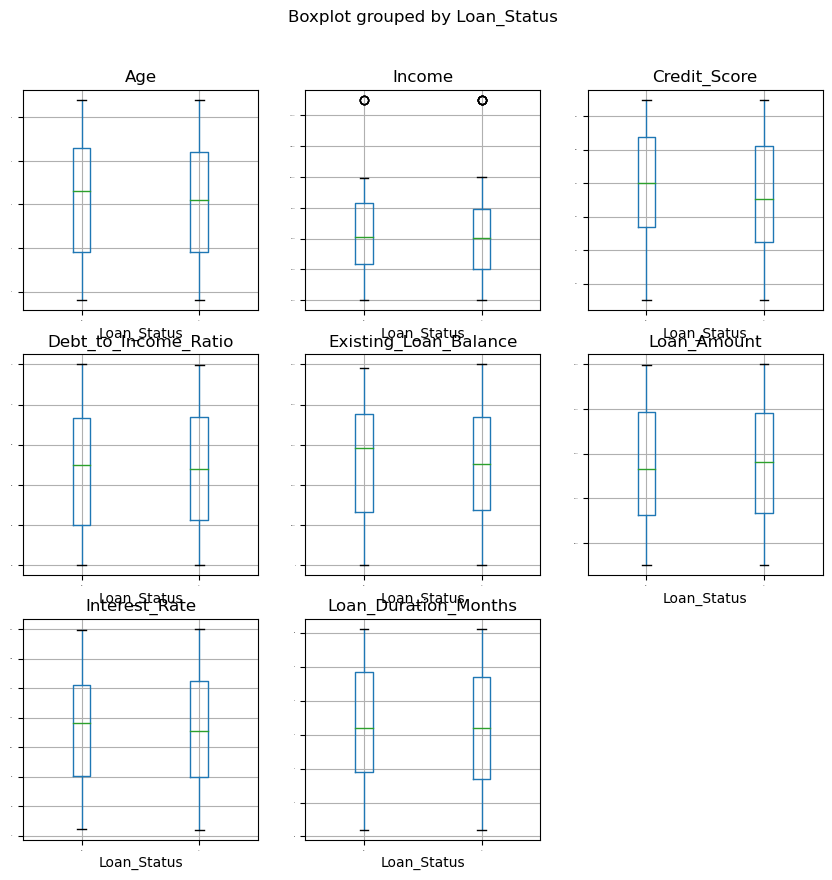

In [243]:
numerical_columns = ['Age','Income','Credit_Score', 'Debt_to_Income_Ratio', 'Existing_Loan_Balance',
                    'Loan_Amount', 'Interest_Rate', 'Loan_Duration_Months']
fig = plt.figure()
fig = plt.figure(figsize=(10, 10))
for i in range(len(numerical_columns)):
    var = numerical_columns[i]
    sub = fig.add_subplot(3,3, i + 1)
    df_encoded.boxplot(column = var, by = "Loan_Status", ax = sub,figsize = (3,3),layout = (3,3),fontsize = 0.1)

### Feature Creation
EMI/NMI Ratio is a key factor in Loan Sanction in Banking sector.It gives a glimpse of what portion of monthly income is spent on repaying Equated Monthly Installments. Generally, banks service loan to individuals with emi/nmi ratio less than 0.70.

In [39]:
#Create new feature EMI/NMI ratio
#p-principal,r-interest rate per month n-no of installments
def emi_calculator(p, R, n):
    r = R/(12*100)
    emi = p * r * ((1+r)**n)/((1+r)**n - 1)
    return emi
df_encoded['Current_Emi_Nmi_Ratio']= emi_calculator(df_encoded['Existing_Loan_Balance'],df_encoded['Interest_Rate'],df_encoded['Loan_Duration_Months'])/(df['Income']/12)

In [40]:
#Debt to Income Ratio based on current Loan Balance
df_encoded['Current_dbi'] = df['Existing_Loan_Balance']/df['Income']

In [42]:
#Find number of Emi's missed months.If Existing Loan Balance is greater than Loan amount it symbolizes that either Emi or Interest portion 
# has not been serviced.In indian counterpart if emi is unserviced for more than 3 months it is considered default. Here missed Emi is 
#found by differencing loan amount and existing loan balance and dividing it by emi. 
df_encoded['Emi_ratio'] = (df_encoded['Existing_Loan_Balance']-df_encoded['Loan_Amount'])/emi_calculator(df_encoded['Existing_Loan_Balance'],df_encoded['Interest_Rate'],df_encoded['Loan_Duration_Months'])


In [43]:
df_encoded.head()

Age  Gender        Income  Employment_Status  Location  Credit_Score  \
0  56.0     0.0  71266.105175                1.0       1.0         639.0   
1  46.0     1.0  37283.054601                1.0       1.0         474.0   
2  32.0     0.0  69567.036392                1.0       2.0         750.0   
3  60.0     1.0  72016.087392                1.0       0.0         435.0   
4  25.0     1.0  32161.988250                0.0       1.0         315.0   

   Debt_to_Income_Ratio  Existing_Loan_Balance  Loan_Status   Loan_Amount  \
0              0.007142           27060.188289          1.0  13068.330587   
1              0.456731           40192.994312          0.0  15159.338369   
2              0.329231           25444.262759          0.0   6131.287659   
3              0.052482            3122.213749          1.0  37531.880251   
4              0.450236           19197.350445          1.0  41466.397989   

   Interest_Rate  Loan_Duration_Months  Current_Emi_Nmi_Ratio  Current_dbi  \
0      18.185533                  59.0               0.117379     0.379706   
1      11.727471                  69.0               0.258633     1.078050   
2      17.030462                  69.0               0.100173     0.365752   
3      16.868949                  26.0               0.024027     0.043354   
4      18.891582                  66.0               0.175280     0.596896   

    Emi_ratio  
0   20.071727  
1   31.153719  
2   33.256326  
3 -238.629541  
4  -47.403103

### Pearson Correlation
As expected Current Dbi and Current Emi/Nmi shows strong co-relation with Existing Loan Balance.Current dbi and Current Emi/Nmi ratio shows strong relation.However, they are all below the threshold of 0.80.Hence,not dropped.

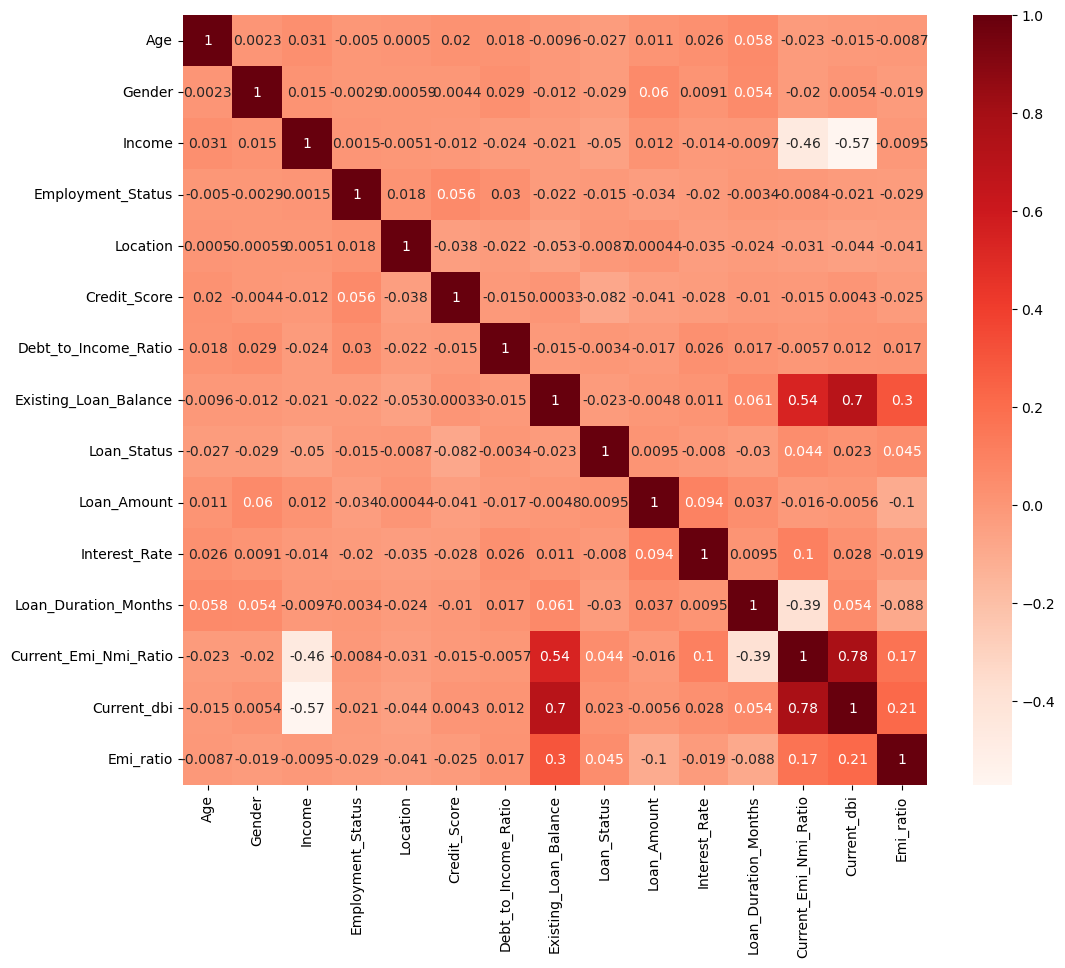

In [474]:
#Using Pearson Correlation to find the relation
plt.figure(figsize=(12,10))
cor = df_encoded.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Train-Test data split
Data is converted into Train,Validation and Test in the ratio 80:10:10. Random State is assigned to enable the uniformity in prediction accuracy. Startify was specified to make the distribution of target variable in test,valid split mimics the distribution in Target variable

In [48]:
# Splitting dataset into Train,Validate and Test
indep_var = df_encoded.loc[:,['Age', 'Gender', 'Income', 'Employment_Status', 'Location','Credit_Score', 'Debt_to_Income_Ratio',
        'Existing_Loan_Balance','Loan_Amount', 'Interest_Rate', 'Loan_Duration_Months','Current_dbi','Current_Emi_Nmi_Ratio','Emi_ratio']]
target_var = df_encoded.loc[:,['Loan_Status']]

X = indep_var
y = target_var
#Splitting dataset into Train and Validation
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.20,stratify = y, random_state=42)

#Splitting Validation to validation and test
X_val, X_test, y_val, y_test = train_test_split(X_, y_, train_size=0.5)

In [49]:
X_train.head()

Age  Gender        Income  Employment_Status  Location  Credit_Score  \
192  61.0     0.0  48430.765495                1.0       1.0         508.0   
909  37.0     1.0  28151.391045                1.0       1.0         676.0   
365  19.0     0.0  61550.868760                0.0       2.0         392.0   
450  46.0     0.0  31357.759181                0.0       2.0         668.0   
431  43.0     1.0  78519.719227                0.0       0.0         595.0   

     Debt_to_Income_Ratio  Existing_Loan_Balance   Loan_Amount  Interest_Rate  \
192              0.232404           22454.169634   7508.731931       5.056996   
909              0.256830           12738.379316  49290.832256      10.188553   
365              0.994775           24876.465801  27337.951475       5.758004   
450              0.236849           23705.103792  24110.555559      10.778670   
431              0.223086           24909.935978  27773.739308       6.704376   

     Loan_Duration_Months  Current_dbi  Current_Emi_Nmi_Ratio   Emi_ratio  
192                  13.0     0.463634               0.440701    8.402806  
909                  57.0     0.452496               0.120562 -129.237424  
365                  30.0     0.404161               0.173966   -2.758541  
450                  12.0     0.755957               0.800816   -0.193750  
431                  71.0     0.317244               0.065102   -6.722784

### Handling imbalanced data using SMOTENC
The Default sample dataset is way less than Non-dafault. Because of the imbalanced data, model will learn only the non-default parameters well as the data is comparitively higher than default dataset. So it is necessary to balance the model. Smote or Synthetic Minority Oversampling Technique handles only numerical values. Hence SMOTE_NC technique was used to handle the categorical and numerical values oversampling 

In [50]:
# Using SMOTENC to handle categorical and Numerical data
#SMOTE handles only numerical data well
smote_nc = SMOTENC(categorical_features=[1,3,4], random_state=0)
X_train_res, y_train_res = smote_nc.fit_resample(X_train, y_train.to_numpy().ravel())

In [51]:
print("Before SMOTE :")
print(y_train.value_counts())
print("After SMOTE :")
print("No of defauts :",(y_train_res==0).sum() )
print("No of non-defaults :",(y_train_res==1).sum())
print(y_train_res.shape)

Before SMOTE :
Loan_Status
1.0            644
0.0            156
dtype: int64
After SMOTE :
No of defauts : 644
No of non-defaults : 644
(1288,)


In [52]:
# Re-labelling Train dataset for one-hot Encoding
X_train_res['Gender']=X_train_res['Gender'].map({0 : 'Male', 1 : 'Female'})
X_train_res['Employment_Status'] = X_train_res['Employment_Status'].map({0 : 'Unemployed',1 : 'Employed' })
X_train_res['Location'] = X_train_res['Location'].map({0 : 'Rural' , 1 : 'Suburban', 2 : 'Urban'})


In [53]:
X_train_res.isnull().sum()


Age                      0
Gender                   0
Income                   0
Employment_Status        0
Location                 0
Credit_Score             0
Debt_to_Income_Ratio     0
Existing_Loan_Balance    0
Loan_Amount              0
Interest_Rate            0
Loan_Duration_Months     0
Current_dbi              0
Current_Emi_Nmi_Ratio    0
Emi_ratio                0
dtype: int64

### One-Hot Encoding
The categorical variables in dataset are nominal i.e., no inherent order is present in the dataset. Hence categorical variables are being One-hot-Encoded

In [55]:
# One Hot Encoding Train dataset
#Set_output gives output as dataframe
of_enc = OneHotEncoder(sparse_output=False,handle_unknown='ignore').set_output(transform="pandas")
Xtrain_encoded1 = of_enc.fit_transform(X_train_res[["Gender","Employment_Status","Location"]])

#concating the encodings
Xtrain_encoded = pd.concat([X_train_res,Xtrain_encoded1],axis=1).drop(columns=["Gender",'Employment_Status','Location'])

In [56]:
Xtrain_encoded.head()

Age        Income  Credit_Score  Debt_to_Income_Ratio  \
0  61.0  48430.765495         508.0              0.232404   
1  37.0  28151.391045         676.0              0.256830   
2  19.0  61550.868760         392.0              0.994775   
3  46.0  31357.759181         668.0              0.236849   
4  43.0  78519.719227         595.0              0.223086   

   Existing_Loan_Balance   Loan_Amount  Interest_Rate  Loan_Duration_Months  \
0           22454.169634   7508.731931       5.056996                  13.0   
1           12738.379316  49290.832256      10.188553                  57.0   
2           24876.465801  27337.951475       5.758004                  30.0   
3           23705.103792  24110.555559      10.778670                  12.0   
4           24909.935978  27773.739308       6.704376                  71.0   

   Current_dbi  Current_Emi_Nmi_Ratio   Emi_ratio  Gender_Female  Gender_Male  \
0     0.463634               0.440701    8.402806            0.0          1.0   
1     0.452496               0.120562 -129.237424            1.0          0.0   
2     0.404161               0.173966   -2.758541            0.0          1.0   
3     0.755957               0.800816   -0.193750            0.0          1.0   
4     0.317244               0.065102   -6.722784            1.0          0.0   

   Employment_Status_Employed  Employment_Status_Unemployed  Location_Rural  \
0                         1.0                           0.0             0.0   
1                         1.0                           0.0             0.0   
2                         0.0                           1.0             0.0   
3                         0.0                           1.0             0.0   
4                         0.0                           1.0             1.0   

   Location_Suburban  Location_Urban  
0                1.0             0.0  
1                1.0             0.0  
2                0.0             1.0  
3                0.0             1.0  
4                0.0             0.0

In [57]:
#Saving One-hot Encoding
with open("one_hot_encoder.pkl",'wb') as f:
    pickle.dump(of_enc,f)

### Standardizing and Normalizing the dataset

In [58]:
# standardization 
sc = StandardScaler()
scaled_data = sc.fit_transform(Xtrain_encoded)

#PowerTransformer
pt = PowerTransformer()
normalized_data = pt.fit_transform(Xtrain_encoded)

In [59]:
#Saving standard scaler
with open("standard_scalar.pkl",'wb') as f:
    pickle.dump(sc,f)

In [60]:
#Saving power Transformer
with open("normal_data.pkl",'wb') as f:
    pickle.dump(pt,f)
    1

### Logistic Regression

In [78]:
#Logistic Regression
log = LogisticRegression()
log.fit(scaled_data,y_train_res.ravel())

LogisticRegression()

In [79]:
#Re-labelling Validation data
X_val['Gender']=X_val['Gender'].map({0 : 'Male', 1 : 'Female'})
X_val['Employment_Status'] = X_val['Employment_Status'].map({0 : 'Unemployed',1 : 'Employed' })
X_val['Location'] = X_val['Location'].map({0 : 'Rural' , 1 : 'Suburban', 2 : 'Urban'})


In [80]:
#One hot Encoding validation data
log_onehot = pd.read_pickle("\one_hot_encoder.pkl")
X_val_encoded1 = log_onehot.transform(X_val[["Gender","Employment_Status","Location"]])

#Joining encoded data with validation data
X_val_encoded = pd.concat([X_val,X_val_encoded1],axis=1).drop(columns=["Gender",'Employment_Status','Location'])

#Scaling Encoded data
sc_pickle = pd.read_pickle("standard_scalar.pkl")
scaled_val = sc_pickle.fit_transform(X_val_encoded)

#Normalizing validation data
normal_pickle = pd.read_pickle("normal_data.pkl")
normal_val = normal_pickle.fit_transform(X_val_encoded)

In [81]:
#predicting validation data
Xval_array = scaled_val
yval_array = y_val.to_numpy()
pred_log_val = log.predict(Xval_array)
print(classification_report(yval_array, pred_log_val))

              precision    recall  f1-score   support

         0.0       0.23      0.60      0.33        20
         1.0       0.83      0.49      0.61        80

    accuracy                           0.51       100
   macro avg       0.53      0.54      0.47       100
weighted avg       0.71      0.51      0.56       100



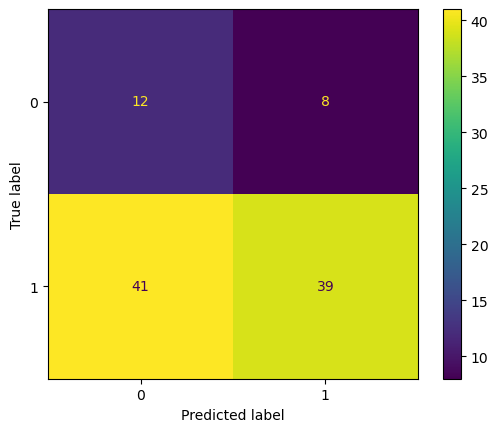

In [82]:
#Confusion matrix
cm = confusion_matrix(yval_array, pred_log_val)
display = ConfusionMatrixDisplay(cm)
display.plot()
plt.show()

### Decision Tree

In [83]:
tree = DecisionTreeClassifier()
tree.fit(scaled_data,y_train_res.ravel())

DecisionTreeClassifier()

In [84]:
#predicting validation data
Xval_array = scaled_val
pred_tree_val = tree.predict(Xval_array)
print(classification_report(yval_array, pred_tree_val))

              precision    recall  f1-score   support

         0.0       0.26      0.45      0.33        20
         1.0       0.83      0.69      0.75        80

    accuracy                           0.64       100
   macro avg       0.55      0.57      0.54       100
weighted avg       0.72      0.64      0.67       100



In [ ]:
#Grid Search
param_grid ={"max_depth": [50,100,150,200],'min_samples_split': [1,3,9,12,15],
    'min_samples_leaf':[1,3,5,9,12]}
                 
                        
search = GridSearchCV(tree, param_grid).fit(normalized_data,y_train_res.ravel())

print("The best hyperparameters are ",search.best_params_)

In [91]:
tree1 = DecisionTreeClassifier(max_depth=100)
tree1.fit(normalized_data,y_train_res.ravel())
pred_tree_val = tree1.predict(normal_val)
print(classification_report(yval_array, pred_tree_val))

              precision    recall  f1-score   support

         0.0       0.29      0.55      0.38        20
         1.0       0.85      0.66      0.75        80

    accuracy                           0.64       100
   macro avg       0.57      0.61      0.56       100
weighted avg       0.74      0.64      0.67       100



In [397]:
tree1.feature_importances_

array([0.08838454, 0.12532593, 0.12765624, 0.12641376, 0.05910984,
       0.1363285 , 0.09972281, 0.08025238, 0.03249688, 0.08639198,
       0.0017762 , 0.        , 0.00329885, 0.01140886, 0.01524571,
       0.00441133, 0.0017762 ])

### XGBClassifier

In [90]:
#XGBClassifier
xgb = XGBClassifier()
xgb.fit(normalized_data,y_train_res.ravel())
pred_xgb = xgb.predict(normal_val)
print(classification_report(yval_array, pred_xgb))

              precision    recall  f1-score   support

         0.0       0.25      0.20      0.22        20
         1.0       0.81      0.85      0.83        80

    accuracy                           0.72       100
   macro avg       0.53      0.53      0.53       100
weighted avg       0.70      0.72      0.71       100



### Balanced Bagging Classifier

In [92]:
#base_estimator = DecisionTreeClassifier()
bbc = BalancedBaggingClassifier(estimator=tree1, sampling_strategy='auto', replacement=False, random_state=42)

In [93]:
bbc.fit(normalized_data,y_train_res.ravel())
pred_bb = bbc.predict(normal_val)
print(classification_report(yval_array, pred_bb))

              precision    recall  f1-score   support

         0.0       0.29      0.60      0.39        20
         1.0       0.86      0.64      0.73        80

    accuracy                           0.63       100
   macro avg       0.58      0.62      0.56       100
weighted avg       0.75      0.63      0.67       100



### Knn Classifier

In [96]:
knn = KNeighborsClassifier()
knn.fit(normalized_data,y_train_res.ravel())


KNeighborsClassifier()

In [98]:
#Predicting Validation data
pred_knn = knn.predict(normal_val)
print(classification_report(yval_array, pred_knn))

              precision    recall  f1-score   support

         0.0       0.19      0.55      0.29        20
         1.0       0.79      0.42      0.55        80

    accuracy                           0.45       100
   macro avg       0.49      0.49      0.42       100
weighted avg       0.67      0.45      0.50       100



### Hyper-parameter Tuning

In [370]:
#Grid Search
param_grid ={"learning_rate" : (0.15,0.20),
                        "n_estimators": [50,100,200,500]}
                 
                        
search = GridSearchCV(adab, param_grid, cv=5).fit(scaled_data,y_train_res.ravel())

print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.15, 'n_estimators': 50}


### AdaBoost

In [99]:
adab = AdaBoostClassifier(estimator = tree1,learning_rate = 0.15, n_estimators= 50)
adab.fit(normalized_data,y_train_res.ravel())
pred_adab = adab.predict(normal_val)
print(classification_report(yval_array, pred_adab))

              precision    recall  f1-score   support

         0.0       0.29      0.55      0.38        20
         1.0       0.85      0.66      0.75        80

    accuracy                           0.64       100
   macro avg       0.57      0.61      0.56       100
weighted avg       0.74      0.64      0.67       100



### Random Forest Classifer

In [100]:
randf = RandomForestClassifier(n_estimators= 50)
randf.fit(normalized_data,y_train_res.ravel())
pred_rand = randf.predict(normal_val)
print(classification_report(yval_array, pred_rand))

              precision    recall  f1-score   support

         0.0       0.28      0.55      0.37        20
         1.0       0.85      0.64      0.73        80

    accuracy                           0.62       100
   macro avg       0.56      0.59      0.55       100
weighted avg       0.73      0.62      0.66       100



### Gradient Booster

In [102]:
#Gradient Booster
grad = GradientBoostingClassifier(n_estimators= 100)
grad.fit(scaled_data,y_train_res.ravel())
pred_grad = grad.predict(scaled_val)
print(classification_report(yval_array, pred_grad))

              precision    recall  f1-score   support

         0.0       0.21      0.45      0.29        20
         1.0       0.81      0.57      0.67        80

    accuracy                           0.55       100
   macro avg       0.51      0.51      0.48       100
weighted avg       0.69      0.55      0.59       100



### Testing 

In [105]:
#Re-labelling Testing data
X_test['Gender']=X_val['Gender'].map({0 : 'Male', 1 : 'Female'})
X_test['Employment_Status'] = X_test['Employment_Status'].map({0 : 'Unemployed',1 : 'Employed' })
X_test['Location'] = X_test['Location'].map({0 : 'Rural' , 1 : 'Suburban', 2 : 'Urban'})


In [107]:
#One hot Encoding Testing data
log_onehot = pd.read_pickle("E:\Winnie Documents\Guvi\project\Capstone\Loan Default prediction\one_hot_encoder.pkl")
X_test_encoded1 = log_onehot.transform(X_test[["Gender","Employment_Status","Location"]])

#Joining encoded data with testing data
X_test_encoded = pd.concat([X_test,X_test_encoded1],axis=1).drop(columns=["Gender",'Employment_Status','Location'])

#Scaling testing data
sc_pickle = pd.read_pickle("E:\Winnie Documents\Guvi\project\Capstone\Loan Default prediction\standard_scalar.pkl")
scaled_test = sc_pickle.fit_transform(X_test_encoded)

#Normalizing testing data
normal_pickle = pd.read_pickle("E://Winnie Documents//Guvi//project//Capstone//Loan Default prediction//normal_data.pkl")
normal_test = normal_pickle.fit_transform(X_test_encoded)

In [109]:
#Ada booster
pred_adab_test = adab.predict(normal_test)
print(classification_report(y_test, pred_adab_test))

              precision    recall  f1-score   support

         0.0       0.16      0.32      0.21        19
         1.0       0.79      0.62      0.69        81

    accuracy                           0.56       100
   macro avg       0.48      0.47      0.45       100
weighted avg       0.67      0.56      0.60       100



In [110]:
#Balanced Bagging
bbc_test = bbc.predict(normal_test)
print(classification_report(y_test, bbc_test))

              precision    recall  f1-score   support

         0.0       0.13      0.32      0.18        19
         1.0       0.76      0.51      0.61        81

    accuracy                           0.47       100
   macro avg       0.44      0.41      0.40       100
weighted avg       0.64      0.47      0.53       100



In [111]:
#XGB Classifier
xgb_test = xgb.predict(normal_test)
print(classification_report(y_test, xgb_test))

              precision    recall  f1-score   support

         0.0       0.19      0.26      0.22        19
         1.0       0.81      0.74      0.77        81

    accuracy                           0.65       100
   macro avg       0.50      0.50      0.50       100
weighted avg       0.69      0.65      0.67       100



In [112]:
#Decision Tree
tree_test = tree1.predict(normal_test)
print(classification_report(y_test, tree_test))

              precision    recall  f1-score   support

         0.0       0.21      0.42      0.28        19
         1.0       0.82      0.63      0.71        81

    accuracy                           0.59       100
   macro avg       0.52      0.53      0.50       100
weighted avg       0.71      0.59      0.63       100

